In [1]:
import pandas as pd 
import numpy as np 

# Load and preprocess train data

In [2]:
df = pd.read_csv('securitytextsdetection/train.csv')

In [3]:
df.dtypes

example_id    object
text          object
label          int64
dtype: object

In [4]:
df[:20]

,example_id,text,label
0,140d03eabb7cb5c2558605eb8336689c,brandpost best of both worlds hybrid onsite an...,0
1,f7f1f906c9e2b76e63020f8794516185,$mention$ they shall in all cases except treas...,0
2,39f0b2ebc12e008a7a43ec318d0c3874,lifelock offers to protect you from the equifa...,0
3,ad4e57c69f00548253cb6d47b15c3ce4,skimmer adware spent two months in google play...,1
4,236bfe8f2f145dbcf17be122546946db,just want to love and be loved,0
5,f9f0419dd6ec37b9f72a8a8292a37d0b,cyber attack on barts nhs trust eloited zeroda...,1
6,3e23b538a07b92f2e27b6964dd30242b,docusigns customer email database accessed by ...,1
7,991a2ba0398b4b4bc63201141a401207,ddos real threat that big data can help combat...,1
8,ee2971e296b39717c23e070ef08f64b3,cyberattack glossary thaw are malware phassach...,0
9,a1c2ec94210674309d9896540f6894c8,malware is not going away trust your network s...,0


In [5]:
df.label.value_counts()

0    708
1    481
Name: label, dtype: int64

In [6]:
from string import punctuation

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
#from replacers import
lemmatizer = WordNetLemmatizer() 
stop_words = set(stopwords.words('english'))

In [7]:
def preprocess_text(tokenizer, lemmatizer, stop_words, punctuation, text): 
    tokens = tokenizer(text.lower())
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return [token for token in lemmas if token not in stop_words and token not in punctuation]

df['cleaned'] = df.text.apply(lambda x: preprocess_text(word_tokenize, lemmatizer, stop_words, punctuation, x))

In [8]:
df.head()

,example_id,text,label,cleaned
0,140d03eabb7cb5c2558605eb8336689c,brandpost best of both worlds hybrid onsite an...,0,"[brandpost, best, world, hybrid, onsite, cloud..."
1,f7f1f906c9e2b76e63020f8794516185,$mention$ they shall in all cases except treas...,0,"[mention, shall, case, except, treason, felony..."
2,39f0b2ebc12e008a7a43ec318d0c3874,lifelock offers to protect you from the equifa...,0,"[lifelock, offer, protect, equifax, breach, se..."
3,ad4e57c69f00548253cb6d47b15c3ce4,skimmer adware spent two months in google play...,1,"[skimmer, adware, spent, two, month, google, p..."
4,236bfe8f2f145dbcf17be122546946db,just want to love and be loved,0,"[want, love, loved]"


In [9]:
def flat_nested(nested):
    flatten = []
    for item in nested:
        if isinstance(item, list):
            flatten.extend(item)
        else:
            flatten.append(item)
    return flatten

In [10]:
from collections import Counter, defaultdict 

cnt_vocab1 = Counter(flat_nested(df.cleaned.tolist()))

In [11]:
len(cnt_vocab1)

4145

# Load and preprocess test data

In [12]:
df_test = pd.read_csv('securitytextsdetection/test.csv')

In [13]:
df_test.head()

,example_id,text
0,24bf52cc84b75bce8ee9c0cdd0b5117f,phishing heads to the cloud forbes $url$ cloud
1,708cc462eca0c274bcff304bbc4396f8,Sports Direct Failed to Tell Staff of Data Bre...
2,c5da1d371af9525d2fc2174311e3dae4,understanding vulnerability through humanright...
3,844f5f5be464a0600891ac6b8c1a1afd,cussword manager onelogin hit by data breach $...
4,97daba48c36db68f3e84ebcbf8952aa2,vuln multiple flexense products cve20177310 bu...


In [14]:
df_test['cleaned'] = df_test.text.apply(lambda x: preprocess_text(word_tokenize, lemmatizer, stop_words, punctuation, x))

In [15]:
df_test.head()

,example_id,text,cleaned
0,24bf52cc84b75bce8ee9c0cdd0b5117f,phishing heads to the cloud forbes $url$ cloud,"[phishing, head, cloud, forbes, url, cloud]"
1,708cc462eca0c274bcff304bbc4396f8,Sports Direct Failed to Tell Staff of Data Bre...,"[sport, direct, failed, tell, staff, data, bre..."
2,c5da1d371af9525d2fc2174311e3dae4,understanding vulnerability through humanright...,"[understanding, vulnerability, humanrights, me..."
3,844f5f5be464a0600891ac6b8c1a1afd,cussword manager onelogin hit by data breach $...,"[cussword, manager, onelogin, hit, data, breac..."
4,97daba48c36db68f3e84ebcbf8952aa2,vuln multiple flexense products cve20177310 bu...,"[vuln, multiple, flexense, product, cve2017731..."


In [16]:
df_test.shape

(786, 3)

In [17]:
cnt_vocab2 = Counter(flat_nested(df_test.cleaned.tolist()))

In [18]:
len(cnt_vocab2)

3162

# Train model

In [19]:
cnt_vocab_all = {**cnt_vocab1, **cnt_vocab2}
vocabulary = set(cnt_vocab_all)

In [20]:
len(vocabulary)

5752

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = df.cleaned.apply(lambda x: ' '.join(x))
y = df.label

vectorizer = TfidfVectorizer(vocabulary = vocabulary)
X = vectorizer.fit_transform(corpus)

In [22]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver = 'lbfgs', multi_class = 'multinomial').fit(X, y)

In [23]:
clf.score(X, y)

0.9613120269133726

# sample_submission

In [24]:
corpus_test = df_test.cleaned.apply(lambda x: ' '.join(x))

In [25]:
X_test = vectorizer.fit_transform(corpus_test)

In [26]:
label = clf.predict(X_test)

In [27]:
def Tobinary(arr):
    result = []
    for i in arr:
        if i:
            result.append(True)
        else:
            result.append(False)
    return result

In [28]:
label = Tobinary(label)

In [29]:
sample_submission = pd.DataFrame({'example_id' : df_test['example_id'].tolist(), 'label' : label})

In [30]:
sample_submission

,example_id,label
0,24bf52cc84b75bce8ee9c0cdd0b5117f,False
1,708cc462eca0c274bcff304bbc4396f8,False
2,c5da1d371af9525d2fc2174311e3dae4,False
3,844f5f5be464a0600891ac6b8c1a1afd,True
4,97daba48c36db68f3e84ebcbf8952aa2,True
...,...,...
781,d88c14f3513eeac07d96bf2247e590da,False
782,d86ba8e778366f29d751212248a8b117,False
783,77d311fd2f0fe6e7120e92efc00a3dc1,False
784,d1e6b79eed2ed19f35c2bbc3bf3c7940,True


In [31]:
#sample_submission.to_csv(r'C:\Users\orang\Documents\submission.csv', index = False)

NameError: name 'head' is not defined

# -------------------------------------------------------------------------------------------

# https://www.kaggle.com/sanikamal/text-classification-with-python-and-keras

In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier

import os

In [46]:
sentences = df['text'].values
y = df['label'].values

In [47]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [48]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

In [49]:
X_train


<891x3756 sparse matrix of type '<class 'numpy.int64'>'
	with 12059 stored elements in Compressed Sparse Row format>

In [71]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.8154362416107382


In [72]:


    sentences_train, sentences_test, y_train, y_test = train_test_split(
        sentences, y, test_size=0.25, random_state=1000)

    vectorizer = CountVectorizer()
    vectorizer.fit(sentences_train)
    X_train = vectorizer.transform(sentences_train)
    X_test  = vectorizer.transform(sentences_test)

    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)


First Keras Model

Keras supports two main types of models. You have the Sequential model API and the functional API which can do everything of the Sequential model but it can be also used for advanced models with complex network architectures.

The Sequential model is a linear stack of layers, where you can use the large variety of available layers in Keras. The most common layer is the Dense layer which is your regular densely connected neural network layer with all the weights and biases that you are already familiar with.

Before we build our model, we need to know the input dimension of our feature vectors. This happens only in the first layer since the following layers can do automatic shape inference. In order to build the Sequential model, you can add layers one by one in order

In [73]:
input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [52]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                37570     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 37,581
Trainable params: 37,581
Non-trainable params: 0
_________________________________________________________________


In [53]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)

Epoch 1/100


C:\Users\bokan\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_2/dense_4/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_2/dense_4/embedding_lookup_sparse/Reshape:0", shape=(None, 10), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_2/dense_4/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


90/90 [==============================] - 3s 10ms/step - loss: 0.6652 - accuracy: 0.6182 - val_loss: 0.6060 - val_accuracy: 0.5973
Epoch 2/100
90/90 [==============================] - 0s 2ms/step - loss: 0.5549 - accuracy: 0.6936 - val_loss: 0.5381 - val_accuracy: 0.7215
Epoch 3/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.9053 - val_loss: 0.4794 - val_accuracy: 0.7987
Epoch 4/100
90/90 [==============================] - 0s 3ms/step - loss: 0.3093 - accuracy: 0.9436 - val_loss: 0.4434 - val_accuracy: 0.8054
Epoch 5/100
90/90 [==============================] - 0s 3ms/step - loss: 0.2322 - accuracy: 0.9790 - val_loss: 0.4171 - val_accuracy: 0.8255
Epoch 6/100
90/90 [==============================] - 0s 2ms/step - loss: 0.1763 - accuracy: 0.9727 - val_loss: 0.4076 - val_accuracy: 0.8221
Epoch 7/100
90/90 [==============================] - 0s 2ms/step - loss: 0.1182 - accuracy: 0.9863 - val_loss: 0.3991 - val_accuracy: 0.8255
Epoch 8/100
90/90 [=====

Epoch 59/100
90/90 [==============================] - 0s 2ms/step - loss: 7.9941e-04 - accuracy: 1.0000 - val_loss: 0.6421 - val_accuracy: 0.8221
Epoch 60/100
90/90 [==============================] - 0s 2ms/step - loss: 7.4624e-04 - accuracy: 1.0000 - val_loss: 0.6475 - val_accuracy: 0.8221
Epoch 61/100
90/90 [==============================] - 0s 2ms/step - loss: 6.3014e-04 - accuracy: 1.0000 - val_loss: 0.6526 - val_accuracy: 0.8221
Epoch 62/100
90/90 [==============================] - 0s 3ms/step - loss: 5.1179e-04 - accuracy: 1.0000 - val_loss: 0.6562 - val_accuracy: 0.8221
Epoch 63/100
90/90 [==============================] - 0s 2ms/step - loss: 5.8147e-04 - accuracy: 1.0000 - val_loss: 0.6624 - val_accuracy: 0.8188
Epoch 64/100
90/90 [==============================] - 0s 2ms/step - loss: 4.8514e-04 - accuracy: 1.0000 - val_loss: 0.6678 - val_accuracy: 0.8188
Epoch 65/100
90/90 [==============================] - 0s 2ms/step - loss: 6.1880e-04 - accuracy: 1.0000 - val_loss: 0.6716 -

In [54]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.8054


In [76]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

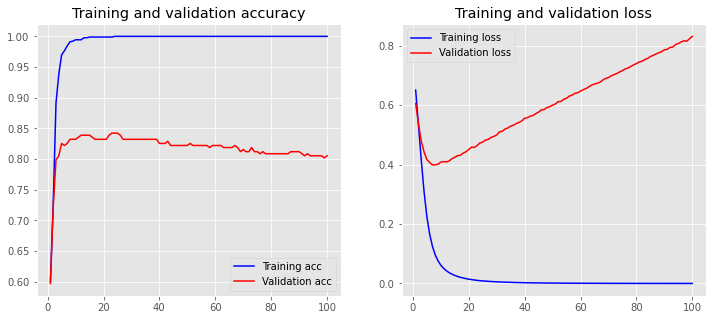

In [77]:
plot_history(history)